###  The main goal of this project is to clean and transform data to maintain its quality, integrity and context for the analytical process and make data ready for a linear regression model.

The data cleaning process is to achieve the data analysis goal which is to identify features for a  machine learning algorithm that assist's the hosts in setting reasonable rental prices for their properties so that they can keep their properties affordable for renters across New york and to achieve  maximum occupancy.

# About the dataset
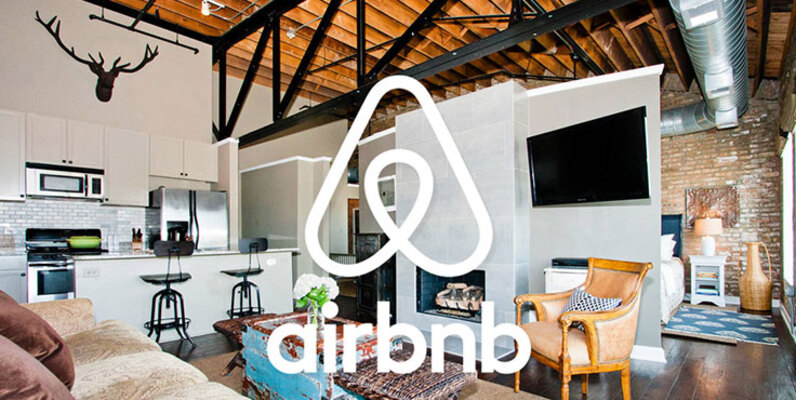

Since 2008, guests and hosts have used Airbnb to travel in a more unique, personalized way. As part of the Airbnb Inside initiative, this dataset describes the listing activity of homestays in New York City. 

This dataset was sourced from Kaggle [here](https://www.kaggle.com/datasets/arianazmoudeh/airbnbopendata).

### Data dictionary
This data dictionary provide detailed information about the contents of the dataset. This can be accessed in full [here](https://docs.google.com/spreadsheets/d/1b_dvmyhb_kAJhUmv81rAxl4KcXn0Pymz).

1. id : Airbnb's unique identifier for the listing.
2. name: Name of the listing.
3. host_id: Airbnb's unique identifier for the host/user.
4. host_identity_verified:
5. host name: Name of the host. Usually just the first name(s).
6. neighbourhood group: The neighbourhood group as geocoded using the latitude and longitude against neighborhoods as defined by open or public digital shapefiles.
7. neighbourhood: The neighbourhood as geocoded using the latitude and longitude against neighborhoods as defined by open or public digital shapefiles.
8. lat(latitude): Uses the World Geodetic System (WGS84) projection for latitude and longitude.
9. long(longitude): Uses the World Geodetic System (WGS84) projection for latitude and longitude.
10. country: 
11. country code:
12. instant_bookable: Whether the guest can automatically book the listing without the host requiring to accept their booking request. An indicator of a commercial listing.
13. cancellation_policy: 
14. room type: All homes are grouped into the following three room type. (Entire place, Private room, Shared room, Entire place).
15. construction year: year in which the property was constructed or built.
16. price: daily price in local currency.
17. service fee: fee charged by Airbnb for using their platform or for additional services provided. 
18. minimum nights: minimum number of night stay for the listing (calendar rules may be different).
19. number of reviews: The number of reviews the listing has.
20. last review: The date of the last/newest review.
21. reviews per month: The number of reviews the listing has over the lifetime of the listing.
22. review rate number: metric related to the rate or frequency of reviews.
23. calculated host listings count: The number of listings the host has in the current scrape, in the city/region geography. 
24. availability 365: The availability of the listing x days in the future as determined by the calendar. Note a listing may not be available because it has been booked by a guest or blocked by the host.
25. house_rules: specific rules or guidelines set by the host for guests staying at the property.
26. license: The licence/permit/registration number.

## Importing Libraries for Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read the data into a dataset
airbnb = pd.read_csv('Airbnb_Open_Data.csv')

C:\Users\DELL\AppData\Local\Temp\ipykernel_12996\2548104601.py:2: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  airbnb = pd.read_csv('Airbnb_Open_Data.csv')


In [3]:
# display all columns in the dataset
pd.set_option('display.max_columns', None)

In [4]:
# preview the dataset
airbnb.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,strict,Private room,2020.0,$966,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,2007.0,$142,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,US,True,flexible,Private room,2005.0,$620,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,True,moderate,Entire home/apt,2005.0,$368,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,False,moderate,Entire home/apt,2009.0,$204,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [5]:
# preview the last rows of data points
airbnb.tail()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,US,False,flexible,Private room,2003.0,$844,$169,1.0,0.0,NaN,NaN,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...,NaN
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,US,True,moderate,Private room,2016.0,$837,$167,1.0,1.0,7/6/2015,0.02,2.0,2.0,395.0,House rules: Guests agree to the following ter...,NaN
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,US,True,moderate,Private room,2009.0,$988,$198,3.0,0.0,NaN,NaN,5.0,1.0,342.0,NaN,NaN
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,US,True,strict,Entire home/apt,2015.0,$546,$109,2.0,5.0,10/11/2015,0.10,3.0,1.0,386.0,NaN,NaN
102598,6094647,585 sf Luxury Studio,68170633372,unconfirmed,Rebecca,Manhattan,Upper West Side,40.76807,-73.98342,United States,US,False,flexible,Entire home/apt,2010.0,"$1,032",$206,1.0,0.0,NaN,NaN,3.0,1.0,69.0,NaN,NaN


In [6]:
# the number of rows and columns in the dataset
airbnb.shape

(102599, 26)

In [7]:
# the size of the dataset  
airbnb.size

2667574

In [8]:
# making a copy of the dataset.
df = airbnb.copy() 

## Data Cleaning and Transformation

In [9]:
# getting information about the dataset.
airbnb.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [10]:
# identifying the missing values in the dataframe
airbnb.isnull().sum()  

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

##### Dropping entire columns.

- This is as a result of excessive missing values and columns having no use to the analysis.

Columns assumed as irrelevant to the project include columns that play no role in pricing and decision to rent or columns that provide no additional information in the context of this project.

In [11]:
# using drop method to drop many columns at once
airbnb.drop(['license', 'house_rules', 'country code', 'host name', 'lat','long'], axis = 1, inplace = True)  

In [12]:
# the data points present
airbnb.shape

(102599, 20)

###### some transformation task  to be performed observed from information about the dataset.

- Construction year is currently a float64 and should be converted to a DateTime object.
- A number of float columns would be converted to int as they are discrete values (availability 365, calculated host listings count, review rate number, reviews per month, number of reviews, minimum nights.
- "reviews per month" column may be converted to whole number.
- "last review" column, an object would be converted to DateTime object.
- remove dollar signs and convert "service fee" and "price" columns to int.
- strip object columns of whitespaces.
- how to deal with the lat and long values.

In [13]:
# display names of columns
airbnb.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified',
       'neighbourhood group', 'neighbourhood', 'country', 'instant_bookable',
       'cancellation_policy', 'room type', 'Construction year', 'price',
       'service fee', 'minimum nights', 'number of reviews', 'last review',
       'reviews per month', 'review rate number',
       'calculated host listings count', 'availability 365'],
      dtype='object')

In [14]:
# summary statistics
airbnb.describe()

,id,host id,Construction year,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
count,1.025990e+05,1.025990e+05,102385.000000,102190.000000,102416.000000,86720.000000,102273.000000,102280.000000,102151.000000
mean,2.914623e+07,4.925411e+10,2012.487464,8.135845,27.483743,1.374022,3.279106,7.936605,141.133254
std,1.625751e+07,2.853900e+10,5.765556,30.553781,49.508954,1.746621,1.284657,32.218780,135.435024
min,1.001254e+06,1.236005e+08,2003.000000,-1223.000000,0.000000,0.010000,1.000000,1.000000,-10.000000
25%,1.508581e+07,2.458333e+10,2007.000000,2.000000,1.000000,0.220000,2.000000,1.000000,3.000000
50%,2.913660e+07,4.911774e+10,2012.000000,3.000000,7.000000,0.740000,3.000000,1.000000,96.000000
75%,4.320120e+07,7.399650e+10,2017.000000,5.000000,30.000000,2.000000,4.000000,2.000000,269.000000
max,5.736742e+07,9.876313e+10,2022.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,3677.000000


In [15]:
airbnb.describe(include='all')

,id,NAME,host id,host_identity_verified,neighbourhood group,neighbourhood,country,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,1.025990e+05,102349,1.025990e+05,102310,102570,102583,102067,102494,102523,102599,102385.000000,102352,102326,102190.000000,102416.000000,86706,86720.000000,102273.000000,102280.000000,102151.000000
unique,NaN,61281,NaN,2,7,224,1,2,3,4,NaN,1151,231,NaN,NaN,2477,NaN,NaN,NaN,NaN
top,NaN,Home away from home,NaN,unconfirmed,Manhattan,Bedford-Stuyvesant,United States,False,moderate,Entire home/apt,NaN,$206,$41,NaN,NaN,6/23/2019,NaN,NaN,NaN,NaN
freq,NaN,33,NaN,51200,43792,7937,102067,51474,34343,53701,NaN,137,526,NaN,NaN,2443,NaN,NaN,NaN,NaN
mean,2.914623e+07,NaN,4.925411e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012.487464,NaN,NaN,8.135845,27.483743,NaN,1.374022,3.279106,7.936605,141.133254
std,1.625751e+07,NaN,2.853900e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.765556,NaN,NaN,30.553781,49.508954,NaN,1.746621,1.284657,32.218780,135.435024
min,1.001254e+06,NaN,1.236005e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,NaN,-1223.000000,0.000000,NaN,0.010000,1.000000,1.000000,-10.000000
25%,1.508581e+07,NaN,2.458333e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007.000000,NaN,NaN,2.000000,1.000000,NaN,0.220000,2.000000,1.000000,3.000000
50%,2.913660e+07,NaN,4.911774e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012.000000,NaN,NaN,3.000000,7.000000,NaN,0.740000,3.000000,1.000000,96.000000
75%,4.320120e+07,NaN,7.399650e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,5.000000,30.000000,NaN,2.000000,4.000000,2.000000,269.000000


In [16]:
-1 in airbnb['availability 365']

False

In [17]:
-1 in airbnb['minimum nights']

False

Since some float columns with missing values would be converted to int columns, -1 would be used as place holder for these NAN values.

The line of code above, after confirming the minimum values in every numeric column, confirms if the place holder is present in these columns or not to avoid interfering with the real data points later.

In [18]:
airbnb['reviews per month'].nunique()

1016

In [19]:
airbnb['reviews per month'].unique()

array([ 0.21,  0.38,   nan, ...,  7.73, 24.49, 33.08])

In [20]:
unique_values = airbnb['reviews per month'].unique()
for value in unique_values:
    print(value)

0.21
0.38
nan
4.64
0.1
0.59
0.4
3.47
0.99
1.33
0.43
1.5
1.34
0.91
0.22
1.2
1.72
2.12
4.44
0.07
1.09
0.37
0.61
0.73
1.37
0.49
1.11
0.24
2.04
1.42
1.65
2.37
0.66
1.41
1.96
1.81
2.08
0.39
0.23
0.69
0.84
2.25
0.52
1.16
1.01
0.63
0.7
2.82
0.9
0.17
2.49
1.19
0.3
0.12
0.57
0.16
4.72
1.4
1.26
1.64
1.6
0.92
0.2
1.28
0.54
0.62
0.15
0.53
1.73
0.05
1.54
0.28
3.4
1.57
1.05
0.71
0.11
0.27
1.23
0.87
2.09
0.6
0.55
3.02
0.79
1.46
1.61
3.0
0.13
4.22
0.06
3.01
3.2
2.03
0.08
0.19
0.33
0.58
2.35
1.86
0.29
0.45
0.25
0.02
3.89
0.77
0.03
0.04
0.01
2.19
0.74
0.09
0.32
1.24
2.6
0.26
1.66
0.94
1.78
0.78
1.06
2.0
0.8
0.75
0.36
1.79
1.92
1.18
0.5
1.17
0.48
1.85
1.04
1.43
2.69
3.52
0.31
3.44
1.0
1.45
3.04
0.35
0.65
1.84
0.96
2.1
4.58
0.67
0.18
1.83
1.82
1.22
1.3
0.34
2.21
1.8
2.3
2.13
1.77
3.19
4.5
0.46
2.39
1.38
0.41
0.14
3.55
2.27
1.27
1.31
1.87
0.56
0.93
0.68
1.25
1.88
0.42
0.44
2.01
2.17
2.81
3.97
0.76
0.51
2.4
1.07
3.88
2.22
1.51
2.26
1.21
3.74
1.76
1.68
3.83
2.53
2.51
3.23
1.44
4.1
1.55
2.41
0.72
0.86
2.18
4.

In [21]:
df['reviews per month'].dropna().astype(int).unique()

array([ 0,  4,  3,  1,  2,  6,  7,  5, 10,  8, 13,  9, 11, 14, 12, 16, 19,
       17, 15, 20, 58, 27, 30, 90, 65, 47, 34, 84, 22, 25, 18, 57, 44, 26,
       24, 33])

The lines of code inspect the values in the 'reviews per month' column to access whether the column should be converted to int. Since the focus of this analyses is not particularly customer satisfaction, the likert scale of the review would be neglected.

<b> converting columns from one data type to another.

In [22]:
# convert construction year column to DateTime object
airbnb['Construction year'] = pd.to_datetime(airbnb['Construction year'], format='%Y')

In [23]:
airbnb['Construction year'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 102599 entries, 0 to 102598
Series name: Construction year
Non-Null Count   Dtype         
--------------   -----         
102385 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 801.7 KB


In [24]:
# convert float columns to int

# filling missing values with -1 as place holder to convert column
airbnb['availability 365'].fillna(-1, inplace=True)

# converting availability 365
airbnb['availability 365'] = airbnb['availability 365'].astype(int)

In [25]:
# filling missing values with -1 as place holder to convert column
airbnb['calculated host listings count'].fillna(-1, inplace=True)

# converting calculated host listings count
airbnb['calculated host listings count'] = airbnb['calculated host listings count'].astype(int)

In [26]:
# filling missing values with -1 as place holder to convert column
airbnb['review rate number'].fillna(-1, inplace=True)

# converting review rate number
airbnb['review rate number'] = airbnb['review rate number'].astype(int)

In [27]:
# filling missing values with -1 as place holder to convert column
airbnb['reviews per month'].fillna(-1, inplace=True)

# converting reviews per month
airbnb['reviews per month'] = airbnb['reviews per month'].astype(int)

In [28]:
# filling missing values with -1 as place holder to convert column
airbnb['number of reviews'].fillna(-1, inplace=True)

# converting number of reviews
airbnb['number of reviews'] = airbnb['number of reviews'].astype(int)

In [29]:
# filling missing values with -1 as place holder to convert column
airbnb['minimum nights'].fillna(-1, inplace=True)

# converting minimum nights
airbnb['minimum nights'] = airbnb['minimum nights'].astype(int)

In [30]:
# convert last review column to DateTime object
airbnb['last review'] = pd.to_datetime(airbnb['last review'])

In [31]:
# remove commas and other characters from the string before converting to float

# for price column
airbnb['price'] = airbnb['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# for service fee column
airbnb['service fee'] = airbnb['service fee'].replace({'\$': '', ',': ''}, regex=True).astype(float)

In [32]:
airbnb[['price', 'service fee']]

,price,service fee
0,966.0,193.0
1,142.0,28.0
2,620.0,124.0
3,368.0,74.0
4,204.0,41.0
...,...,...
102594,844.0,169.0
102595,837.0,167.0
102596,988.0,198.0
102597,546.0,109.0


In [33]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 20 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102349 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   neighbourhood group             102570 non-null  object        
 5   neighbourhood                   102583 non-null  object        
 6   country                         102067 non-null  object        
 7   instant_bookable                102494 non-null  object        
 8   cancellation_policy             102523 non-null  object        
 9   room type                       102599 non-null  object        
 10  Construction year               102385 non-null  datetim

## Checking for Duplicates

In [34]:
# checking for duplicate values

airbnb.duplicated().sum() 

541

In [35]:
# dropping all 541 duplicates

airbnb = airbnb.drop_duplicates()

In [36]:
airbnb.duplicated().sum()

0

Duplicate values have been removed.

#### Inspecting missing values

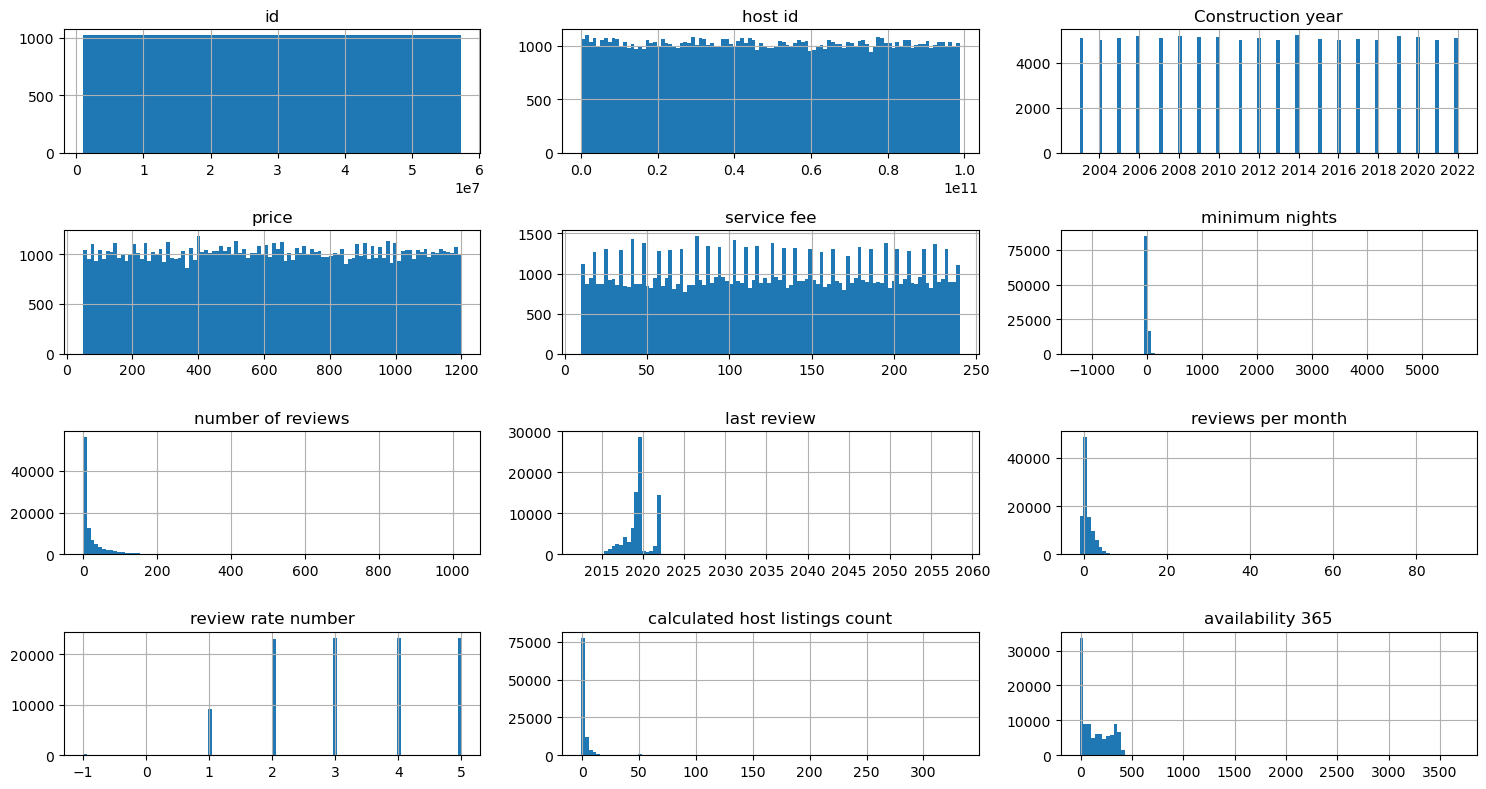

In [37]:
#airbnb.describe(exclude =['O'])
airbnb.hist(bins = 100, figsize=(15, 8))
plt.tight_layout()

array([[<AxesSubplot:title={'center':'Construction year'}>]], dtype=object)

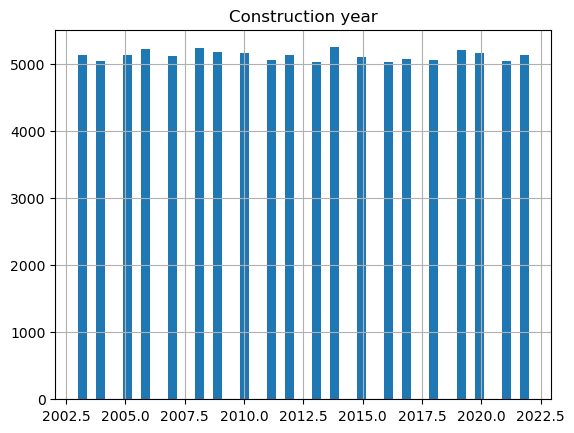

In [38]:
df.hist('Construction year', bins = 50)

The distributon of the dataset show the skew and spread of datasets in each column.
The right and left skew of some histograms  show prescence of outliers in the data set.

For better understanding, the outliers would be visualised using box plots.

<Figure size 1500x1000 with 0 Axes>

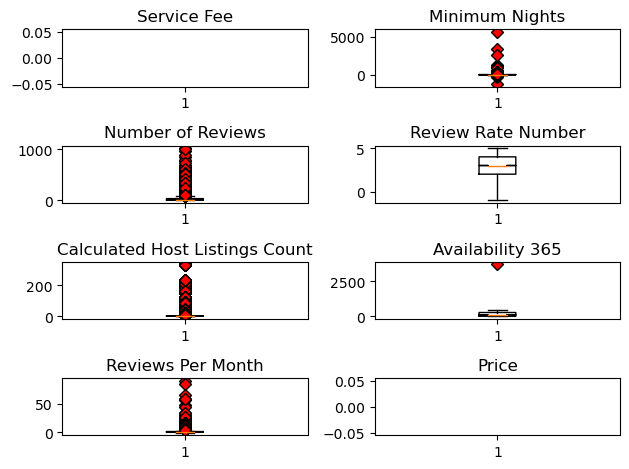

In [39]:
# visualising data with box plots.

# # subseting data to plot
# data = airbnb[['reviews per month','availability 365','calculated host listings count','review rate number',
#                'number of reviews','minimum nights','service fee','price']]

# sub plots
plt.figure(figsize=(15,10))
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4,2)

ax1.boxplot(airbnb['service fee'], notch = True, flierprops=dict(marker='D', markerfacecolor='r'))
ax1.set_title('Service Fee')

ax2.boxplot(airbnb['minimum nights'], notch = True, flierprops=dict(marker='D', markerfacecolor='r'))
ax2.set_title('Minimum Nights')

ax3.boxplot(airbnb['number of reviews'], notch = True, flierprops=dict(marker='D', markerfacecolor='r'))
ax3.set_title('Number of Reviews')

ax4.boxplot(airbnb['review rate number'], notch = True, flierprops=dict(marker='D', markerfacecolor='r'))
ax4.set_title('Review Rate Number')

ax5.boxplot(airbnb['calculated host listings count'], notch = True, flierprops=dict(marker='D', markerfacecolor='r'))
ax5.set_title('Calculated Host Listings Count')

ax6.boxplot(airbnb['availability 365'], notch = True, flierprops=dict(marker='D', markerfacecolor='r'))
ax6.set_title('Availability 365')

ax7.boxplot(airbnb['reviews per month'], notch = True, flierprops=dict(marker='D', markerfacecolor='r'))
ax7.set_title('Reviews Per Month')

ax8.boxplot(airbnb['price'], notch = True, flierprops=dict(marker='D', markerfacecolor='r'));
ax8.set_title('Price')

plt.tight_layout()

plt.show()

- Columns with outliers would be filled with the median and otherwise with the mean.

###### Handling missing values

- Filling missing values.

- Replacing -1 place holder with appropriate values.

- Dropping columns with small amount of missing values.

In [40]:
airbnb.isna().sum()

id                                    0
NAME                                250
host id                               0
host_identity_verified              289
neighbourhood group                  29
neighbourhood                        16
country                             532
instant_bookable                    105
cancellation_policy                  76
room type                             0
Construction year                   214
price                               247
service fee                         273
minimum nights                        0
number of reviews                     0
last review                       15832
reviews per month                     0
review rate number                    0
calculated host listings count        0
availability 365                      0
dtype: int64

In [41]:
airbnb.shape

(102058, 20)

In [42]:
102058-15832

86226

In [43]:
86226 - 15832

70394

In [44]:
airbnb.drop('last review', axis = 1, inplace = True)

In [45]:
airbnb.shape

(102058, 19)

The -1 place holder would be filled with the center of tendency value before it was added. 

In [46]:
# initial summary statistics

df.describe()

,id,host id,lat,long,Construction year,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
count,1.025990e+05,1.025990e+05,102591.000000,102591.000000,102385.000000,102190.000000,102416.000000,86720.000000,102273.000000,102280.000000,102151.000000
mean,2.914623e+07,4.925411e+10,40.728094,-73.949644,2012.487464,8.135845,27.483743,1.374022,3.279106,7.936605,141.133254
std,1.625751e+07,2.853900e+10,0.055857,0.049521,5.765556,30.553781,49.508954,1.746621,1.284657,32.218780,135.435024
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,2003.000000,-1223.000000,0.000000,0.010000,1.000000,1.000000,-10.000000
25%,1.508581e+07,2.458333e+10,40.688740,-73.982580,2007.000000,2.000000,1.000000,0.220000,2.000000,1.000000,3.000000
50%,2.913660e+07,4.911774e+10,40.722290,-73.954440,2012.000000,3.000000,7.000000,0.740000,3.000000,1.000000,96.000000
75%,4.320120e+07,7.399650e+10,40.762760,-73.932350,2017.000000,5.000000,30.000000,2.000000,4.000000,2.000000,269.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,2022.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,3677.000000


In [47]:
# current summary statistics
airbnb.describe()

,id,host id,price,service fee,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
count,1.020580e+05,1.020580e+05,101811.000000,101785.000000,102058.00000,102058.000000,102058.000000,102058.000000,102058.000000,102058.000000
mean,2.918438e+07,4.926738e+10,625.355580,125.039249,8.09087,27.466813,0.690235,3.265359,7.909003,140.420467
std,1.627173e+07,2.853742e+10,331.672649,66.325905,30.56196,49.541974,1.719036,1.305120,32.219751,135.457464
min,1.001254e+06,1.236005e+08,50.000000,10.000000,-1223.00000,-1.000000,-1.000000,-1.000000,-1.000000,-10.000000
25%,1.509286e+07,2.459924e+10,340.000000,68.000000,1.00000,1.000000,0.000000,2.000000,1.000000,2.000000
50%,2.918438e+07,4.912865e+10,625.000000,125.000000,3.00000,7.000000,0.000000,3.000000,1.000000,95.000000
75%,4.327590e+07,7.400619e+10,913.000000,183.000000,5.00000,30.000000,1.000000,4.000000,2.000000,268.000000
max,5.736742e+07,9.876313e+10,1200.000000,240.000000,5645.00000,1024.000000,90.000000,5.000000,332.000000,3677.000000


Since the outliers would be included in the analysis, these columns will be filed with the median values, currently displayed as 0 missing values:
- minimum nights
- number of reviews
- reviews per month
- availability 365
- calculated host listings count

In [48]:
# the median value
median_value = df['minimum nights'].median()
median_value

3.0

In [49]:
# replacing place holder value with median
airbnb['minimum nights'].replace( -1, median_value, inplace=True)

In [50]:
# the median value
median_value = df['number of reviews'].median()

# replacing place holder value with median
airbnb['number of reviews'].replace( -1, median_value, inplace=True)

In [51]:
# the median value of reviews per month column
median_value = df['reviews per month'].median()
median_value

0.74

In [52]:
# the median value is rounded since it returns a float value that affects the data type of the column
median_value = round(df['reviews per month'].median())

# replacing place holder value with median
airbnb['reviews per month'].replace( -1, median_value, inplace=True)

In [53]:
# the median value
median_value = df['availability 365'].median()

# replacing place holder value with median
airbnb['availability 365'].replace( -1, median_value, inplace=True)

In [54]:
# the median value
median_value = df['calculated host listings count'].median()

# replacing place holder value with median
airbnb['calculated host listings count'].replace( -1, median_value, inplace=True)

In [55]:
-1 in airbnb['calculated host listings count']

False

In [56]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102058 entries, 0 to 102057
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102058 non-null  int64         
 1   NAME                            101808 non-null  object        
 2   host id                         102058 non-null  int64         
 3   host_identity_verified          101769 non-null  object        
 4   neighbourhood group             102029 non-null  object        
 5   neighbourhood                   102042 non-null  object        
 6   country                         101526 non-null  object        
 7   instant_bookable                101953 non-null  object        
 8   cancellation_policy             101982 non-null  object        
 9   room type                       102058 non-null  object        
 10  Construction year               101844 non-null  datetim

<b>filling construction year, a datetime object using ffill and bfill

In [57]:
airbnb['Construction year'].ffill(inplace=True)
airbnb['Construction year'].bfill(inplace=True)

<b>The price and service fee columns would be filled with the mean value

In [58]:
airbnb['price'].fillna(airbnb['price'].mean(), inplace = True)

In [59]:
airbnb['service fee'].fillna(airbnb['service fee'].mean(), inplace = True)

<b> filling the country column

In [60]:
# getting the unique values in the country column
airbnb['country'].unique()

array(['United States', nan], dtype=object)

In [61]:
airbnb['country'].nunique()

1

In [62]:
airbnb['country'].fillna('United States', inplace = True)

<b> filling NAME column with null.

In [63]:
airbnb['NAME'].fillna('NULL', inplace = True)

<b> dropping missing values from the rest of the dataset as the number of the missing values have been reduced.

In [64]:
airbnb.dropna(inplace=True)

In [65]:
airbnb.isna().sum()

id                                0
NAME                              0
host id                           0
host_identity_verified            0
neighbourhood group               0
neighbourhood                     0
country                           0
instant_bookable                  0
cancellation_policy               0
room type                         0
Construction year                 0
price                             0
service fee                       0
minimum nights                    0
number of reviews                 0
reviews per month                 0
review rate number                0
calculated host listings count    0
availability 365                  0
dtype: int64

##### Modify column names

This is to make the column names appear in the same format

In [66]:
airbnb.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified',
       'neighbourhood group', 'neighbourhood', 'country', 'instant_bookable',
       'cancellation_policy', 'room type', 'Construction year', 'price',
       'service fee', 'minimum nights', 'number of reviews',
       'reviews per month', 'review rate number',
       'calculated host listings count', 'availability 365'],
      dtype='object')

In [67]:
# converting the column name cases to a uniform one
airbnb.rename(columns=str.lower, inplace=True)

In [68]:
new_column_names = {
    'host_identity_verified': 'host identity verified',
    'instant_bookable': 'instant bookable',
    'cancellation_policy': 'cancellation policy'}

# removing underscores from column names
airbnb.columns = airbnb.columns.str.replace('_', ' ')

# applying the new column names
airbnb.rename(columns=new_column_names, inplace=True)

In [69]:
airbnb.columns

Index(['id', 'name', 'host id', 'host identity verified',
       'neighbourhood group', 'neighbourhood', 'country', 'instant bookable',
       'cancellation policy', 'room type', 'construction year', 'price',
       'service fee', 'minimum nights', 'number of reviews',
       'reviews per month', 'review rate number',
       'calculated host listings count', 'availability 365'],
      dtype='object')

#### Checking for white spaces in the data

- for objects columns

In [70]:
airbnb['name'].str.isspace().sum()

0

In [71]:
airbnb['neighbourhood group'].str.isspace().sum()

0

In [72]:
airbnb['host identity verified'].str.isspace().sum()

0

In [73]:
airbnb['cancellation policy'].str.isspace().sum()

0

In [74]:
airbnb['neighbourhood'].str.isspace().sum()

0

In [75]:
airbnb['country'].str.isspace().sum()

0

In [76]:
airbnb['room type'].str.isspace().sum()

0

From the above exploration, there are no white spaces in the columns of the dataset.

#### Checking for special characters

In [77]:
airbnb

,id,name,host id,host identity verified,neighbourhood group,neighbourhood,country,instant bookable,cancellation policy,room type,construction year,price,service fee,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Brooklyn,Kensington,United States,False,strict,Private room,2020-01-01,966.0,193.000000,10,9,0,4,6,286
1,1002102,Skylit Midtown Castle,52335172823,verified,Manhattan,Midtown,United States,False,moderate,Entire home/apt,2007-01-01,142.0,28.000000,30,45,0,4,2,228
3,1002755,NULL,85098326012,unconfirmed,Brooklyn,Clinton Hill,United States,True,moderate,Entire home/apt,2005-01-01,368.0,74.000000,30,270,4,4,1,322
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Manhattan,East Harlem,United States,False,moderate,Entire home/apt,2009-01-01,204.0,41.000000,10,9,0,3,1,289
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Manhattan,Murray Hill,United States,True,flexible,Entire home/apt,2013-01-01,577.0,115.000000,3,74,0,3,1,374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102053,57365208,Cozy bright room near Prospect Park,77326652202,unconfirmed,Brooklyn,Flatbush,United States,True,moderate,Private room,2016-01-01,696.0,125.039249,7,12,0,5,1,0
102054,57365760,Private Bedroom with Amazing Rooftop View,45936254757,verified,Brooklyn,Bushwick,United States,False,flexible,Private room,2016-01-01,909.0,125.039249,1,19,0,3,2,0
102055,57366313,Pretty Brooklyn One-Bedroom for 2 to 4 people,23801060917,verified,Brooklyn,Bedford-Stuyvesant,United States,True,moderate,Entire home/apt,2016-01-01,387.0,125.039249,2,50,3,4,2,235
102056,57366865,Room & private bathroom in historic Harlem,15593031571,unconfirmed,Manhattan,Harlem,United States,True,strict,Private room,2016-01-01,848.0,125.039249,2,0,1,1,1,0


In [78]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101638 entries, 0 to 102057
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              101638 non-null  int64         
 1   name                            101638 non-null  object        
 2   host id                         101638 non-null  int64         
 3   host identity verified          101638 non-null  object        
 4   neighbourhood group             101638 non-null  object        
 5   neighbourhood                   101638 non-null  object        
 6   country                         101638 non-null  object        
 7   instant bookable                101638 non-null  object        
 8   cancellation policy             101638 non-null  object        
 9   room type                       101638 non-null  object        
 10  construction year               101638 non-null  datetim